In [1]:
import sys
sys.path.append('../mlai_research/')
import log
import utils
import cv2
import rasterio
import rasterio.plot
from rasterio.mask import mask
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from rasterio.warp import reproject, Resampling
from shapely.geometry import box, mapping
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
import geopandas as gpd
from PIL import Image

In [2]:
conf = utils.load_config("base")

22-Dec-23 23:12:21 - INFO - Starting 'load_config'.
22-Dec-23 23:12:21 - INFO - Finished 'load_config' in 0.0270 secs.


In [14]:
dsm = utils.load_raster(f"{conf.data.path_base_dsm}{conf.data.fn_dsm}")
dtm = utils.load_raster(f"{conf.data.path_base_dtm}{conf.data.fn_dtm}")

dsm_aligned = utils.load_raster(f"{conf.data.path_int_al}dsm.tif")
dtm_aligned = utils.load_raster(f"{conf.data.path_int_al}dtm.tif")

22-Dec-23 23:22:43 - INFO - Loaded image: ../data/01_base/dsm_7cm_resampled/dsm_aoi_1.tif
22-Dec-23 23:22:43 - INFO - Image channels: 1
22-Dec-23 23:22:43 - INFO - Image size: 22377x23466
22-Dec-23 23:22:43 - INFO - Image crs: EPSG:32736
22-Dec-23 23:22:43 - INFO - Image bounds: BoundingBox(left=362292.7863346958, bottom=7356585.920366846, right=363843.73620469583, top=7358212.348826846)
22-Dec-23 23:22:43 - INFO - Image transform: | 0.07, 0.00, 362292.79|
| 0.00,-0.07, 7358212.35|
| 0.00, 0.00, 1.00|
22-Dec-23 23:22:43 - INFO - Loaded image: ../data/01_base/dtm_7cm_resampled/dtm_aoi_1.tif
22-Dec-23 23:22:43 - INFO - Image channels: 1
22-Dec-23 23:22:43 - INFO - Image size: 22376x23464
22-Dec-23 23:22:43 - INFO - Image crs: EPSG:32736
22-Dec-23 23:22:43 - INFO - Image bounds: BoundingBox(left=362292.7863346958, bottom=7356585.965130846, right=363843.7563986958, top=7358212.348826846)
22-Dec-23 23:22:43 - INFO - Image transform: | 0.07, 0.00, 362292.79|
| 0.00,-0.07, 7358212.35|
| 0.00,

In [15]:
dsm.shape, dtm.shape, dsm_aligned.shape, dtm_aligned.shape

((23466, 22377), (23464, 22376), (23465, 22376), (23465, 22376))

In [19]:
dsm_arr = dsm.read(1)
# dtm_arr = dtm.read(1)
dsm_aligned_arr = dsm_aligned.read(1)
dtm_aligned_arr = dtm_aligned.read(1)

In [6]:
np.mean(dsm_arr), np.median(dsm_arr), np.std(dsm_arr), np.min(dsm_arr), np.max(dsm_arr)

(100.11342, 0.0, 102.88814, 0.0, 228.64696)

In [18]:
np.mean(dsm_aligned_arr), np.median(dsm_aligned_arr), np.std(dsm_aligned_arr), np.min(dsm_aligned_arr), np.max(dsm_aligned_arr)

(99.86762355956402, 0.0, 102.62982244920413, 0, 228)

In [20]:
np.mean(dtm_aligned_arr), np.median(dtm_aligned_arr), np.std(dtm_aligned_arr), np.min(dtm_aligned_arr), np.max(dtm_aligned_arr)

(99.58483054200792, 0.0, 102.3329938068552, 0, 222)

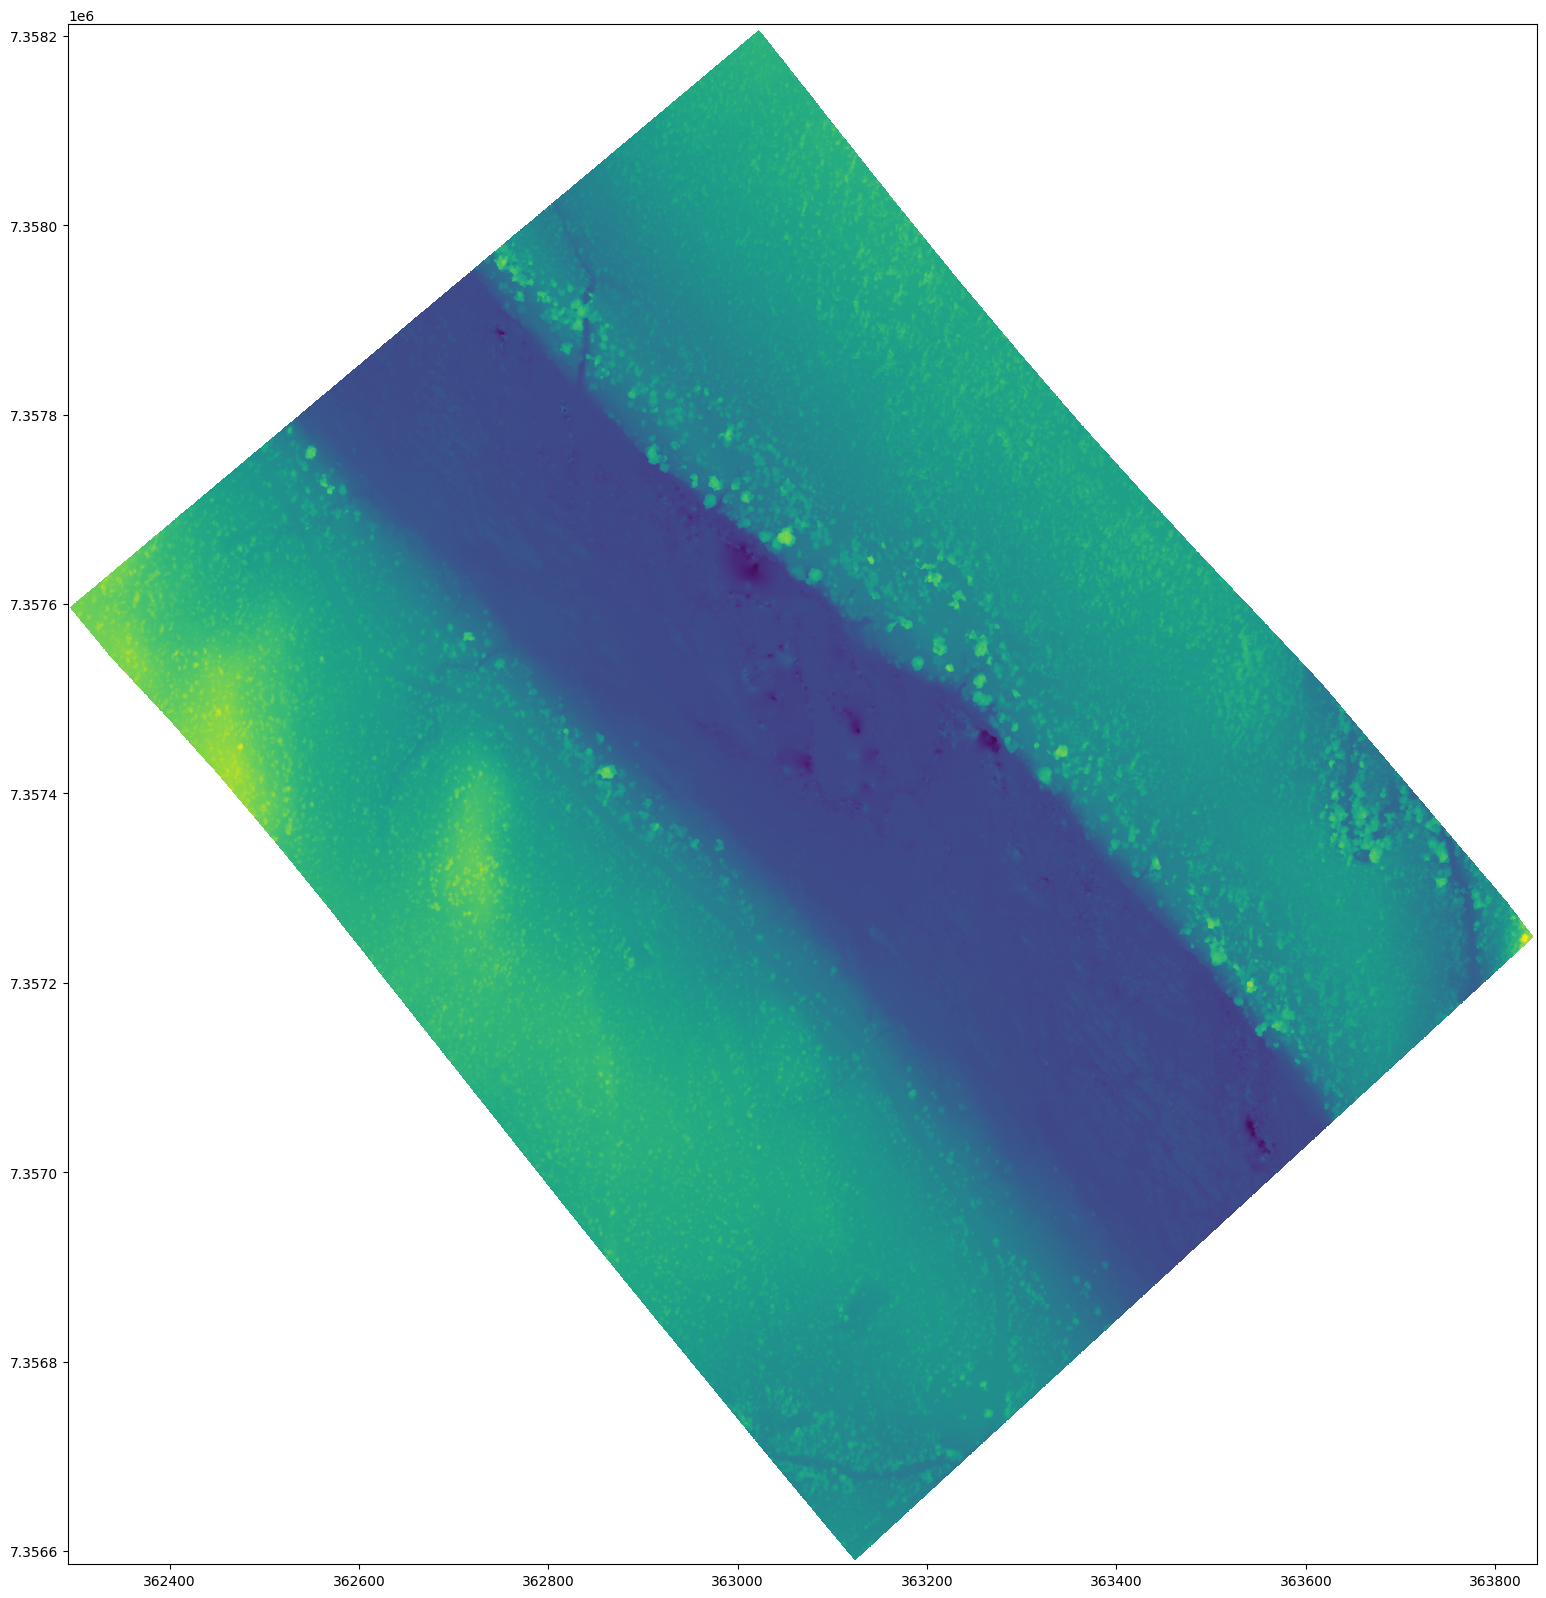

In [11]:
fig, ax = plt.subplots(figsize = (20,20))
rasterio.plot.show(dsm)
plt.show()

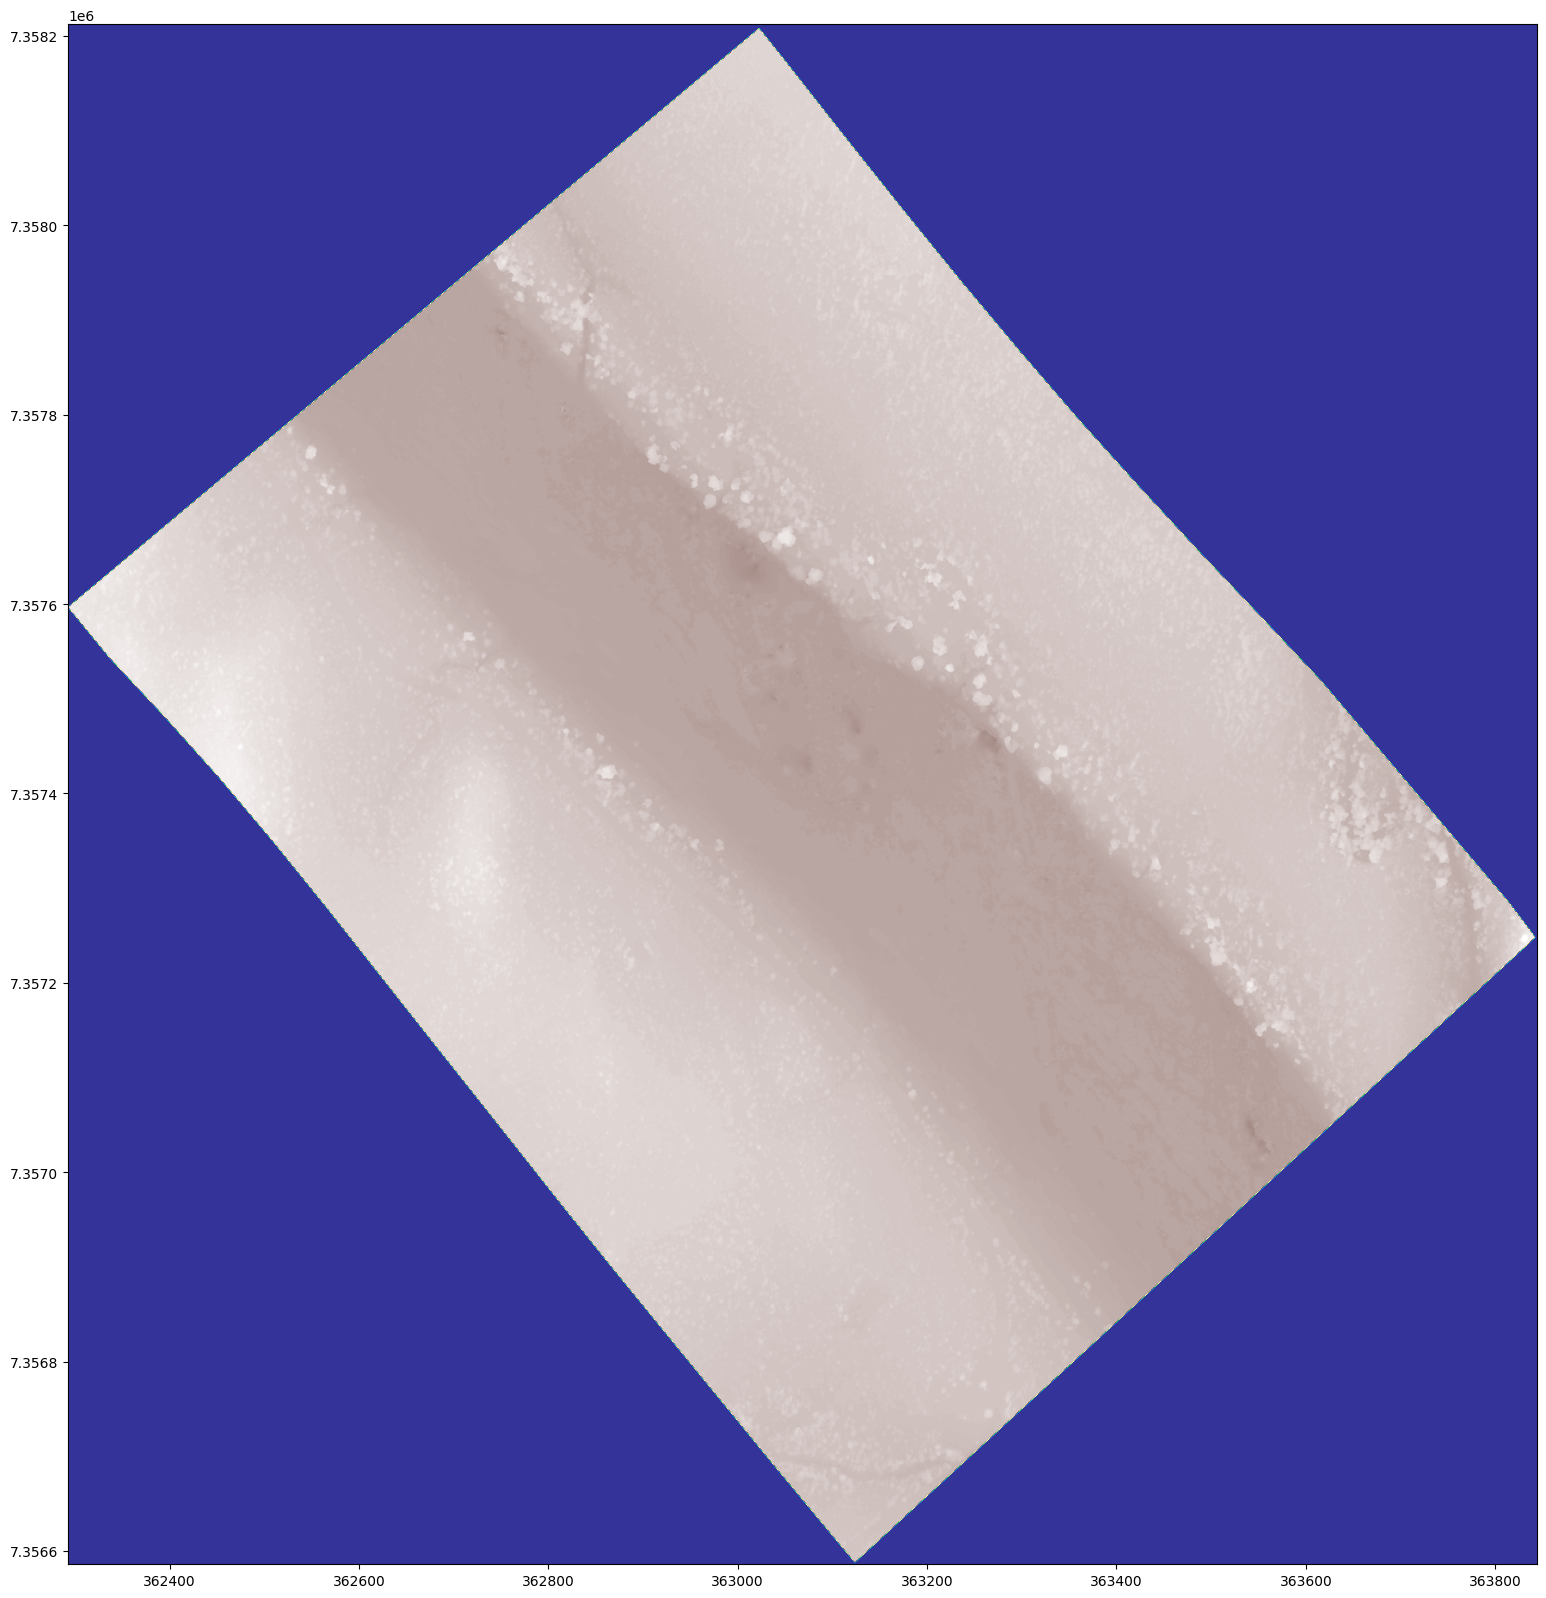

In [22]:
fig, ax = plt.subplots(figsize = (20,20))
rasterio.plot.show(dsm_aligned, cmap='terrain')
plt.show()

In [21]:
ndsm = dsm_aligned_arr - dtm_aligned_arr

In [24]:
np.mean(ndsm), np.median(ndsm), np.std(ndsm), np.min(ndsm), np.max(ndsm)

(0.7424837412554516, 0.0, 10.807731425464466, 0, 255)

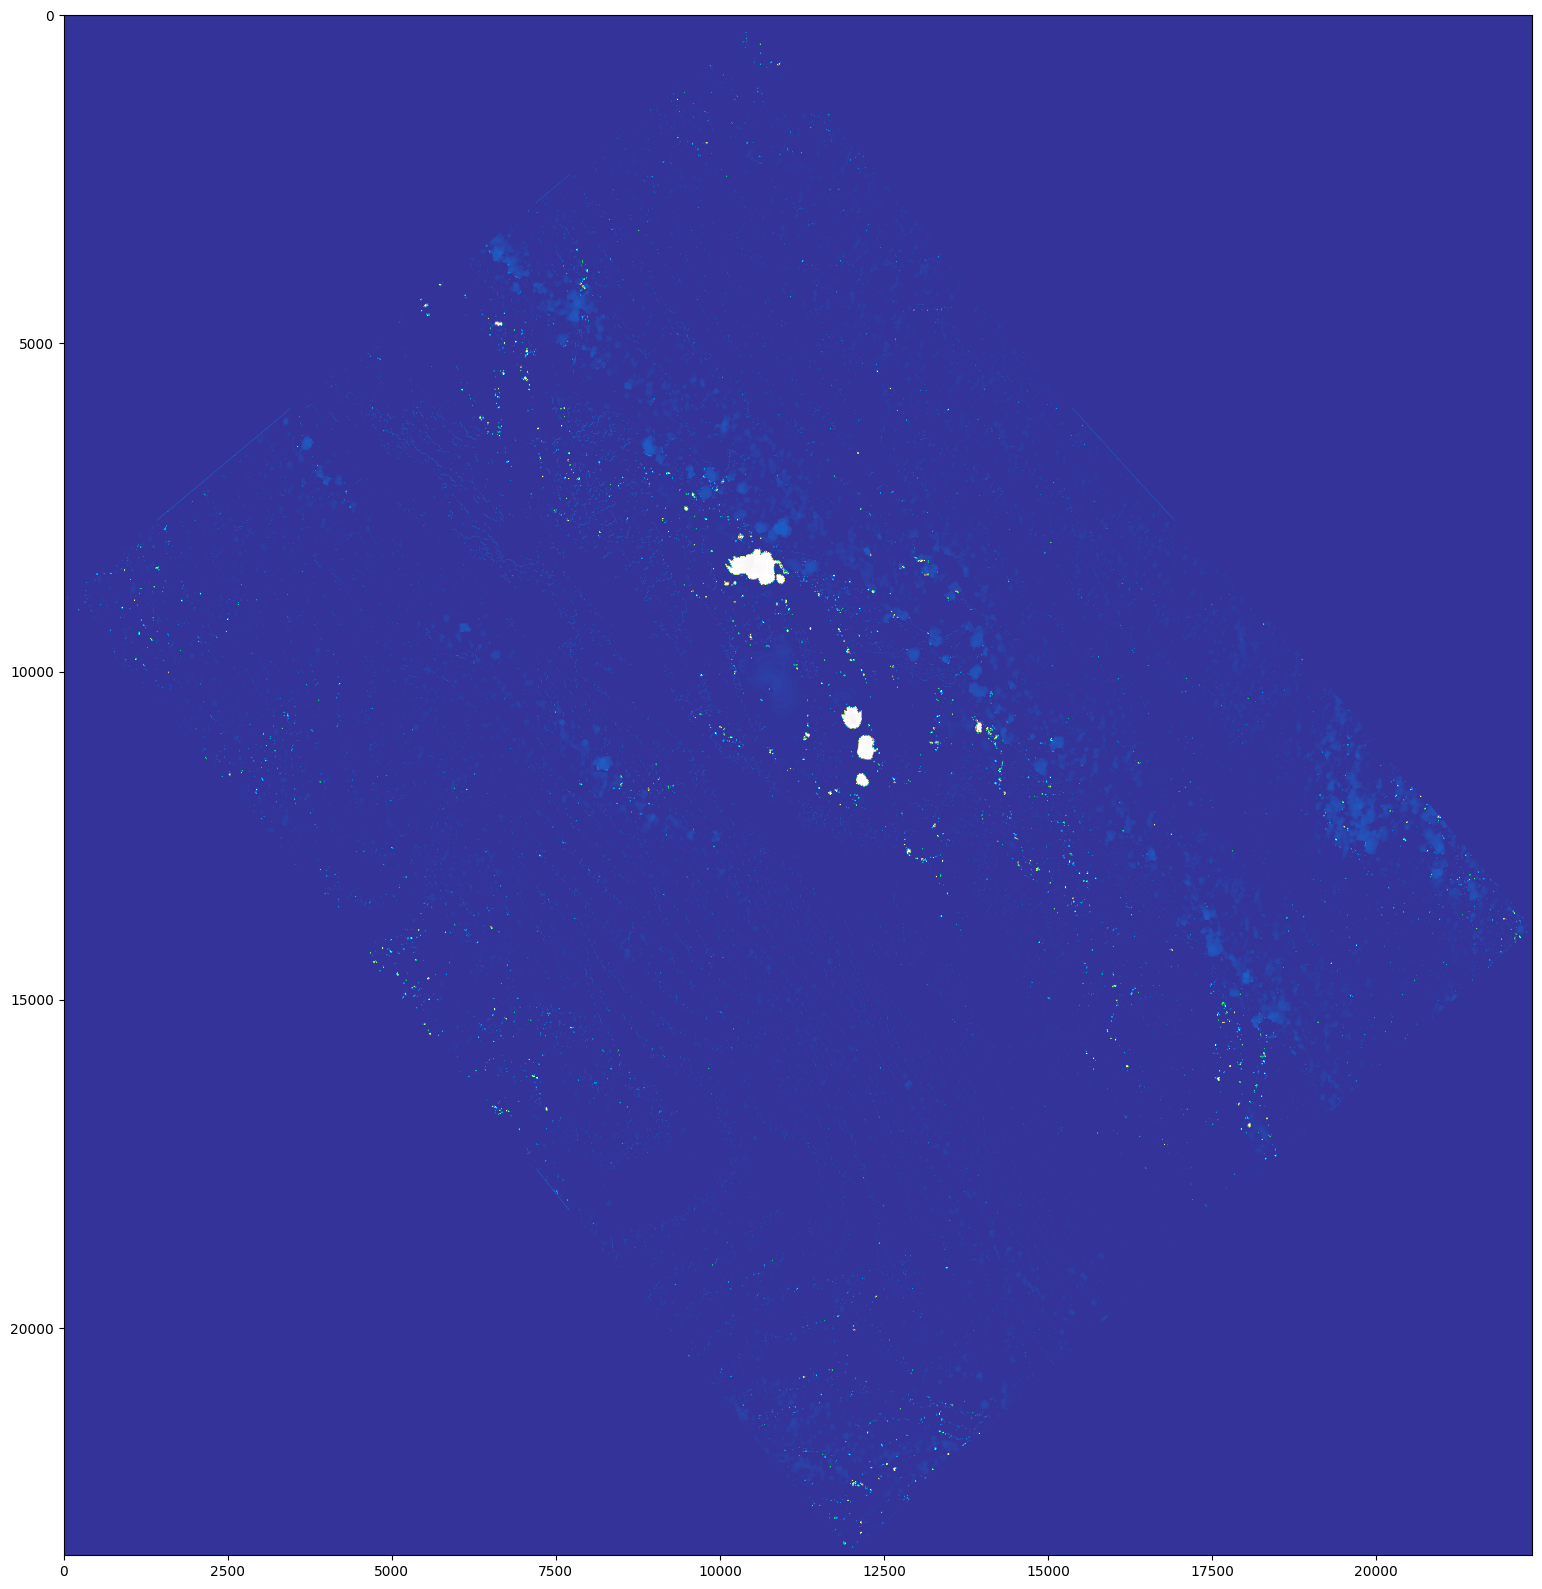

In [23]:
fig, ax = plt.subplots(figsize = (20,20))
rasterio.plot.show(ndsm, cmap='terrain')
plt.show()

In [ ]:
def plot_raster(gdf, rasterimg):
    fig, ax = plt.subplots(figsize = (20,20))
    rasterio.plot.show(rasterimg, ax=ax)
    gdf.plot(column='Species',
                   categorical=True,
                   legend=True,
                   # markersize=45,
                   cmap="Set2",
                   ax=ax,
            aspect=1)
    ax.set_title("Letaba Points Subset")
    # for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.photoID):
    #     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    plt.show()